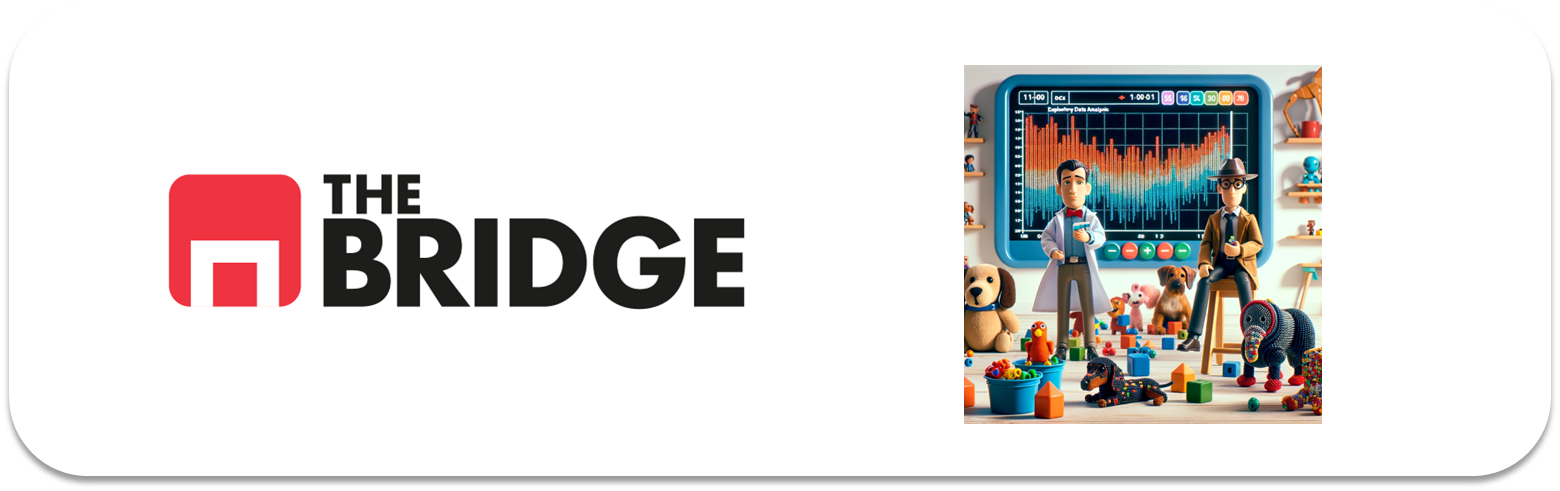

## Análisis de Datos (Multivariante): Todo numéricas

Supongamos que por el desarrollo y necesidades del análisis de datos tenemos que cotejar varias vairables numéricas a la vez. Además de las posibles visualizaciones que pueda recomendarte el interesante [sitio](https://www.data-to-viz.com) que ya hemos mencionado otras veces, yo te prongo como punto de partida (luego tendrás que completarlo tú) lo siguiente que viene a continuación en el notebook.

Como tónica habitual de este sprint, cargamos, importamos, arrancamos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Caso 2. Viajes: Ingresos-Consumo_kg-Distancia

Lo primero sería mostrar los valores y diagramas de cada uno así como las correlaciones dos a dos:

(3, 2)


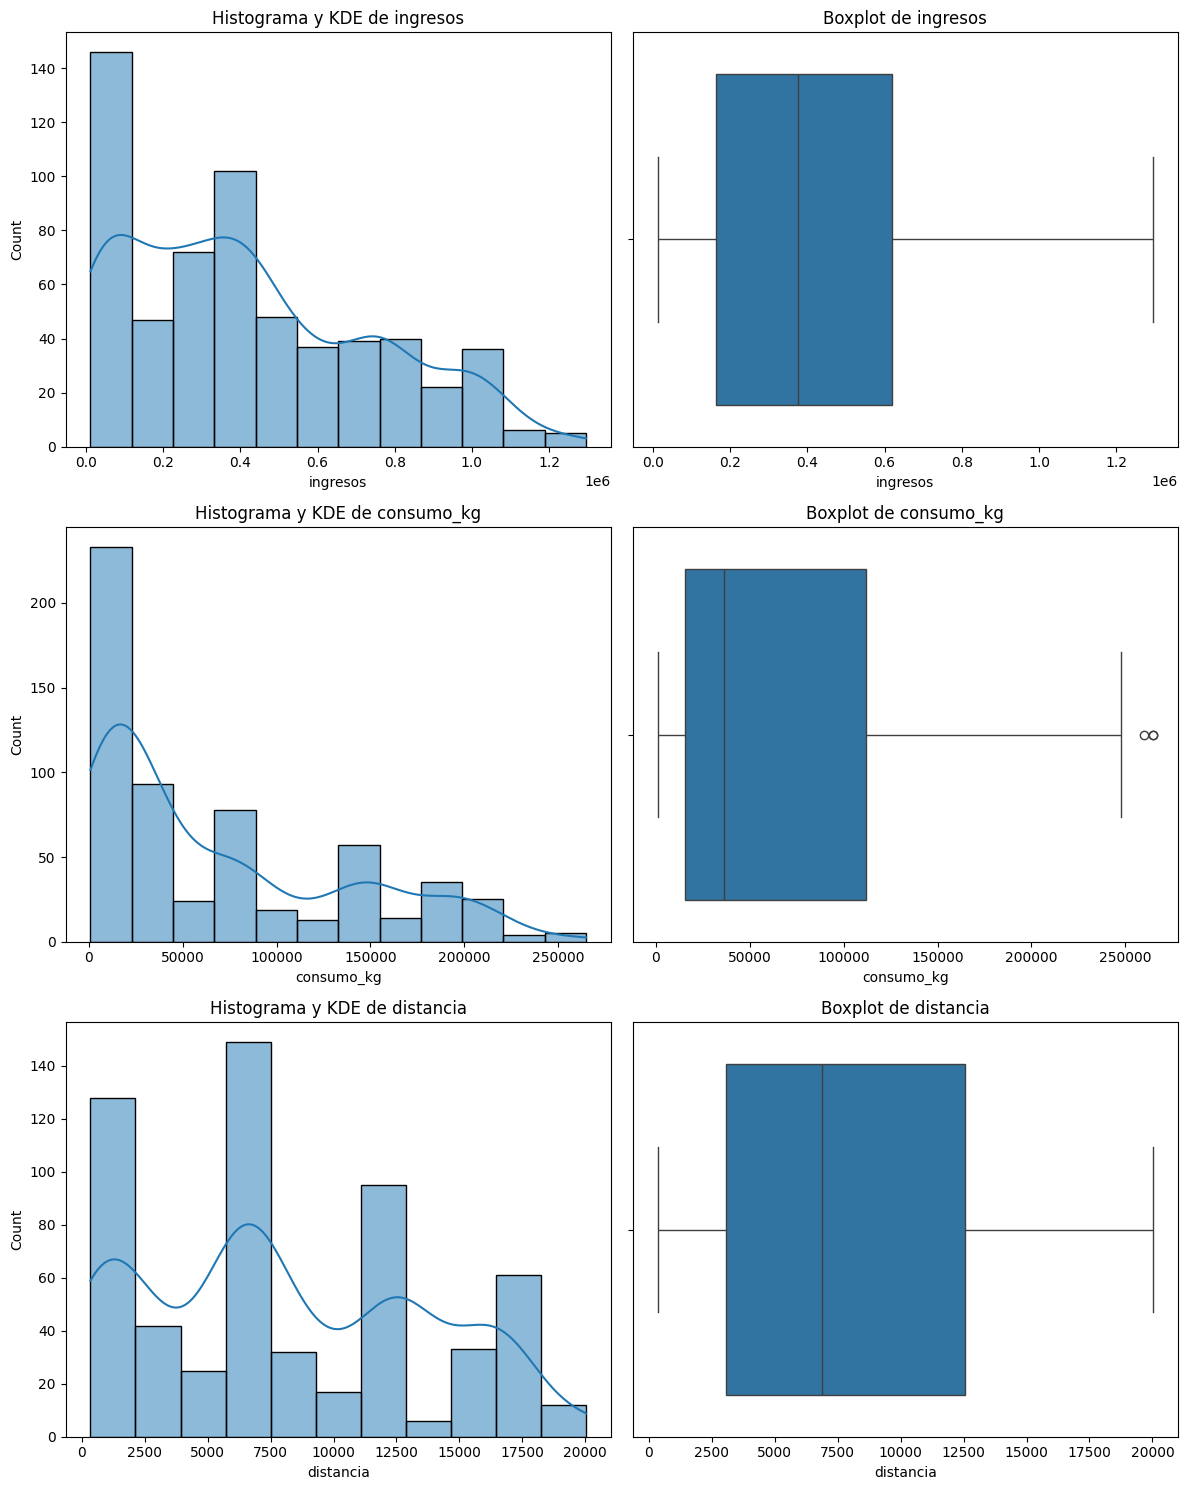

In [2]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

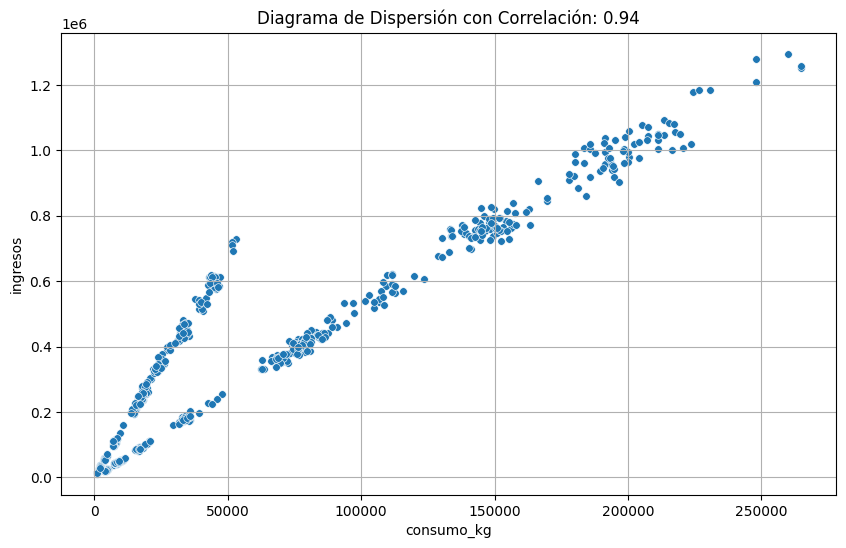

In [3]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

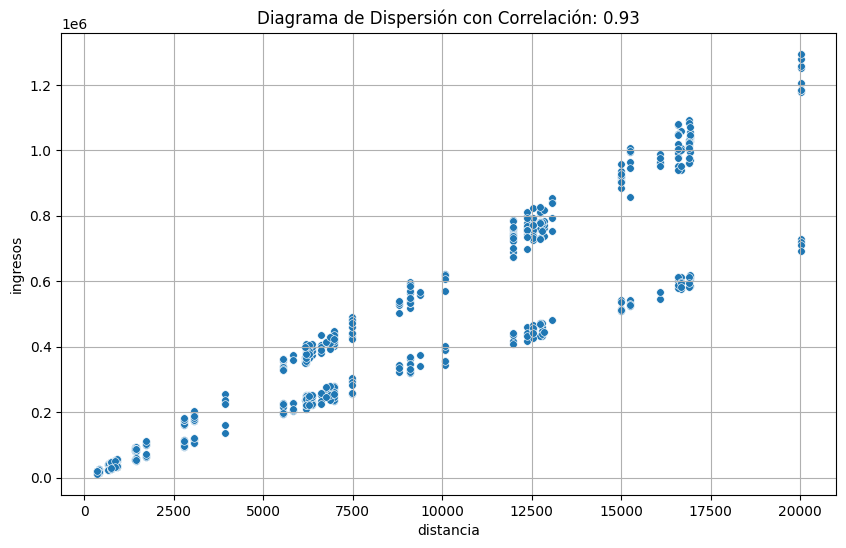

In [4]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

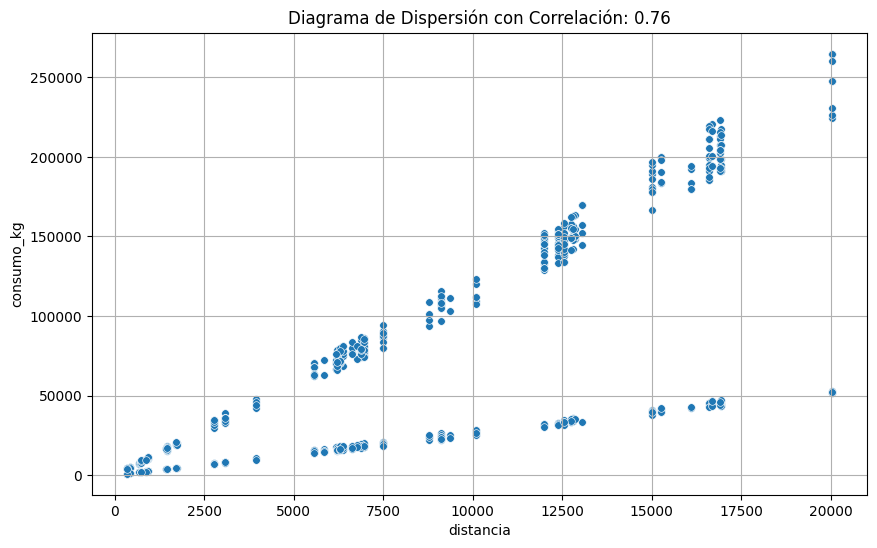

In [5]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

Lo siguiente será mostrar los tres valores a la vez, con un diagrama de burbujas que es como un scatter plot (un diagrama de dispersión) pero en el que el tamaño de los puntos los marca la tercera variable:

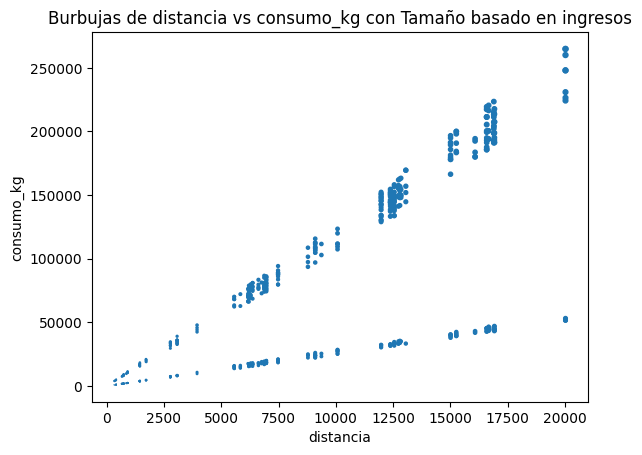

In [6]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

El tamaño de las burbujas depende de los ingresos, se ve la correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares. Es decir parece y esta sería una gran línea de trabajo, un conjunto de viajes que son más eficientes en todos los términos que otros. 

Pero ahí no acaba el análisis. El siguente paso sería escoger una de las tres, hacerle un *binning* o convertirla a categórica y estaríamos en el análisis multivariante explicado en la sesión anterior. Este caso lo veremos en los ejercicios

### Analisis multivariante: Matriz de correlación

Para terminar, pandas permite obtner la matriz de correlación de sus variables numéricas. Es decir una matriz en la que aparecen las correlaciones (de pearson, si no se indica lo contrario) dos a dos:

In [7]:
corr_matrix = df_seguros.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


Y aún hay más, con seaborn podemos hacer una representación de esta matriz a través de lo que se denomina un "mapa de calor":

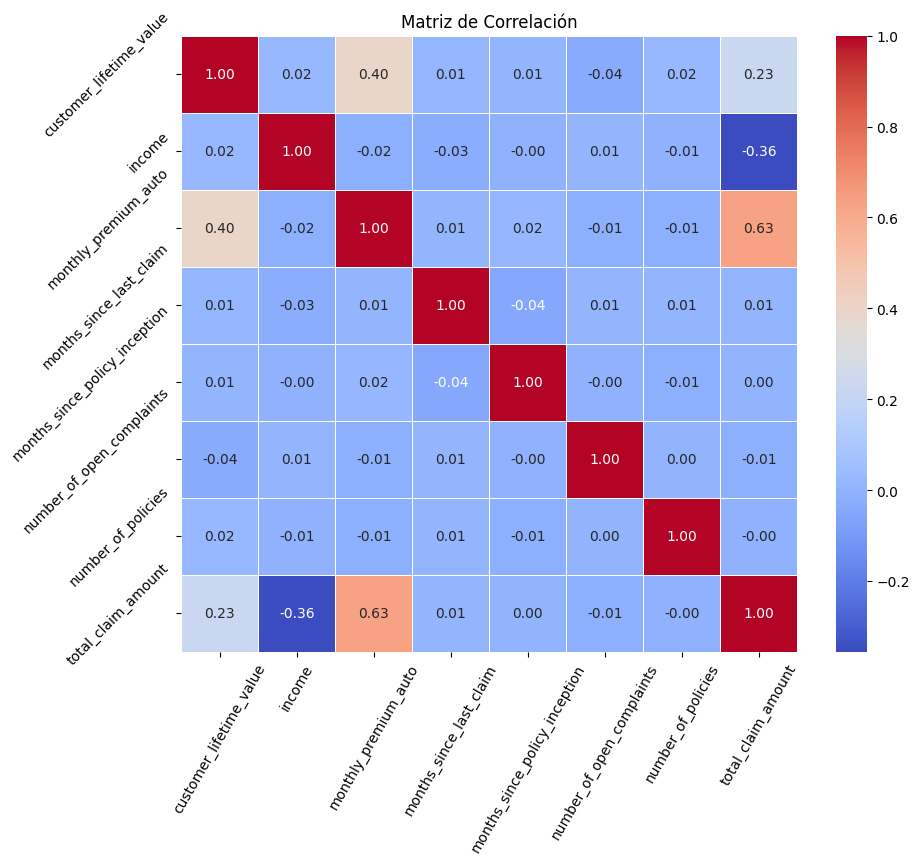

In [11]:

plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=60)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()


Y para terminar también es posible completar tu análisis bivariante/multivariante con una visualización de los diagramas de dispersión (pero ojo que si son muchos no verás nada)

In [12]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

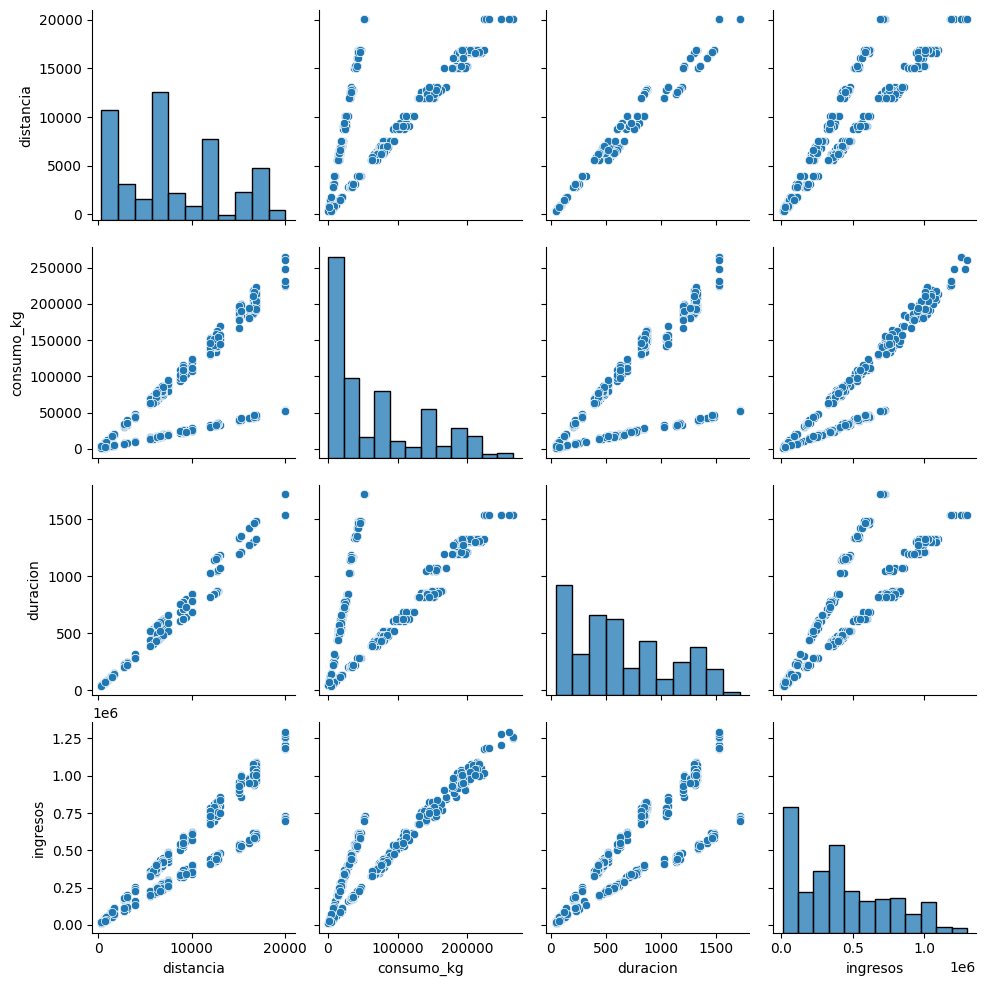

In [13]:
sns.pairplot(df_solo_numeros)
plt.show()

### ANALISIS DE DATOS: (humilde) GUIA DE REFERENCIA 

PARTE I  
1. **Establecer objetivos**  
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables** 

PARTE II  
4. **Aplicar tendencia central a todas las variables**  
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras   
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja  
7. **Analizar las medidas de dispersión de las variables numéricas**  
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)  
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")  
10. **Trata los outliers**: separa en dos, elimina, crea una categoría especial...   

PARTE III  
11. **Revisa prioridades, preguntas y notas hasta el momento**  
12. **Preparara el analisis bivariante** en función de la revisión anterior.  
13. **Empieza por categóricas importantes/target**: combinalas con categóricas y numéricas  
14. **Sigue con numéricas importantes/target**  
15. **Analiza las parejas de variables que necesites para contestar tus preguntas**  
    15.1 **Es directo así que: Matriz de correlación, heatmap y pairplot**  
16. **Recapitula**: Clasifica ya tus hallazgos en posibles mensajes, elementos a profundizar, cosas interesantes pero no importantes (descártalas). Añade las preguntas contestadas y la lista de preguntas sin contestar.  

PARTE IV  
17. **Intenta resolver todas las preguntas pendientes**  
18. Si necesitas análisis más complicados (3 o más variables): Planifica muy bien que grupos  
19. Aplica lo visto en estas sesiones, tendrás que probar variaciones hasta llegar a encontrar el punto adecuado.  
20. **Acaba el análisis**: Cierras las preguntas pendientes, lo que te quede por trabajar -> Lineas de trabajo futuro.  

